In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import pandas as pd
import datetime as dt

mask_directory = '/Users/kathum/Research/COPEX/sink_region_files/masks'
WAM_files = '/Volumes/LaCie_10TB_Keys_KH/era5/output/backtrack/co_altclimate_nfr_2000_2023/'
sink_region_name = 'nfr'

In [2]:
def make_mask(region):
    region_csvpath = '/Users/kathum/Research/COPEX/sink_region_files/source_region_information.csv'
    region_info = pd.read_csv(region_csvpath)
    region_filepath = region_info.loc[region_info['region_name']== region, 'mask_filepath'].values
    
    #read in the mask associated with this region
    if region.capitalize() == 'Colorado':
        mask = xr.open_dataarray(region_filepath[0])
        #remove the sink region from this mask
        remove_mask = xr.open_dataarray(region_info.loc[region_info['other_acronym']== sink_region_name, 'mask_filepath'].item())
        mask = mask - remove_mask
        mask = mask.where(mask>0, other = 0)
        remove_mask.close()
    elif region.lower() == 'western us':
        #remove colorado and the sink region from this mask
        mask = xr.open_dataarray(region_filepath[0])
        for remove_region in [region_info.loc[region_info['other_acronym']== sink_region_name, 'region_name'].item(), 'Colorado']:
            remove_mask = xr.open_dataarray(region_info.loc[region_info['region_name']== remove_region, 'mask_filepath'].item())
            mask = mask - remove_mask
        mask = mask.where(mask == 1, other = 0)
        remove_mask.close()
    elif region== 'Other Water':
        mask = 1 - xr.open_dataarray('/Users/kathum/Research/COPEX/sink_region_files/masks/land_source_region.nc') 
        mask = mask.squeeze()
        water_mask_paths = region_info.loc[(region_info['surface_type'].notnull()), ['mask_filepath']].values.squeeze()
        for path in water_mask_paths:
            remove_mask =  xr.open_dataarray(path)
            mask = mask - remove_mask
        remove_mask.close()
        mask = mask.where(mask>0, other = 0)
    elif region == 'Other Land':
        mask = xr.open_dataarray('/Users/kathum/Research/COPEX/sink_region_files/masks/land_source_region.nc')
        mask = mask.squeeze()
        land_mask_paths = region_info.loc[(region_info['surface_type'].notnull()), ['mask_filepath']].values.squeeze()
        for path in land_mask_paths:
            remove_mask =  xr.open_dataarray(path)
            mask = mask - remove_mask
        remove_mask.close()
        mask = mask.where(mask>0, other = 0)    
    else:
        mask = xr.open_dataarray(region_filepath[0])
    
    return mask

## Create CSV

### Daily e-track values (not lagged)

In [64]:
# region_csvpath = '/Users/kathum/Research/COPEX/sink_region_files/source_region_information.csv'
# region_info = pd.read_csv(region_csvpath)
# files = sorted(glob.glob(WAM_files+'*.nc'))[:-80] #NC files to be used and removing wam output from after Sept 30th
# regions = ['Other Water','Pacific Ocean','Gulf of California', 'Atlantic Ocean','Gulf of Mexico', 'Other Land', 'Western US', 'Southern US','Midwestern US','Colorado',
#            'Eastern Plains','Front Range','Pikes Peak','Arkansas Basin','High Mountain Valley']

# data_dict = {}
# for i, file in enumerate(files):
#     day_data = xr.open_dataset(file)['e_track']
#     data_dict[i] = {'date':pd.date_range(file[-19:-9], periods=1)[0]}
#     for region in regions:
#         region_mask = make_mask(region)
#         day_region_e_track = (day_data * region_mask).sum(dim=['latitude','longitude']).values
#         data_dict[i][region+'_e_track'] = day_region_e_track
#     day_data.close()
#     print('Date done:',file[-19:-9])
        
# data_df = pd.DataFrame(data_dict).transpose()
# print('rows: ', data_df.shape[0])
# print('cols: ', data_df.shape[1])

Date done: 2000-01-01
Date done: 2000-01-02
Date done: 2000-01-03
Date done: 2000-01-04
Date done: 2000-01-05
Date done: 2000-01-06
Date done: 2000-01-07
Date done: 2000-01-08
Date done: 2000-01-09
Date done: 2000-01-10
Date done: 2000-01-11
Date done: 2000-01-12
Date done: 2000-01-13
Date done: 2000-01-14
Date done: 2000-01-15
Date done: 2000-01-16
Date done: 2000-01-17
Date done: 2000-01-18
Date done: 2000-01-19
Date done: 2000-01-20
Date done: 2000-01-21
Date done: 2000-01-22
Date done: 2000-01-23
Date done: 2000-01-24
Date done: 2000-01-25
Date done: 2000-01-26
Date done: 2000-01-27
Date done: 2000-01-28
Date done: 2000-01-29
Date done: 2000-01-30
Date done: 2000-01-31
Date done: 2000-02-01
Date done: 2000-02-02
Date done: 2000-02-03
Date done: 2000-02-04
Date done: 2000-02-05
Date done: 2000-02-06
Date done: 2000-02-07
Date done: 2000-02-08
Date done: 2000-02-09
Date done: 2000-02-10
Date done: 2000-02-11
Date done: 2000-02-12
Date done: 2000-02-13
Date done: 2000-02-14
Date done:

In [65]:
# data_df.to_csv('/Users/kathum/Classes/fall_2024/Data_driven Analysis/Data_Driven_Prediction/nfr_daily_e_track.csv')

In [70]:
# #how many time lags wanted
# lag_days = 30
# lags = [i for i in range(lag_days)]

# lagged_df = pd.DataFrame({
#     f'{col}_t-{lag}': data_df[col].shift(lag)
#     for lag in lags
#     for col in data_df.iloc[:,1:]
# })

# #add back in the date column
# lagged_df.insert(0, "Date",data_df.iloc[:,0])
# lagged_df

# lagged_df.to_csv('/Users/kathum/Classes/fall_2024/Data_driven Analysis/Data_Driven_Prediction/lagged_'+str(lag_days)+'_nfr_daily_e_track.csv')


In [71]:
lagged_df

,Date,Other Water_e_track_t-0,Pacific Ocean_e_track_t-0,Gulf of California_e_track_t-0,Atlantic Ocean_e_track_t-0,Gulf of Mexico_e_track_t-0,Other Land_e_track_t-0,Western US_e_track_t-0,Southern US_e_track_t-0,Midwestern US_e_track_t-0,...,Other Land_e_track_t-29,Western US_e_track_t-29,Southern US_e_track_t-29,Midwestern US_e_track_t-29,Colorado_e_track_t-29,Eastern Plains_e_track_t-29,Front Range_e_track_t-29,Pikes Peak_e_track_t-29,Arkansas Basin_e_track_t-29,High Mountain Valley_e_track_t-29
0,2000-01-01 00:00:00,8042.574794012333,4349084.9512779005,6382.884692013264,854599.611052634,1934.162124201026,58054.98983023991,1980851.4313719848,170.94983419842902,3696.024621677585,...,None,None,None,None,None,None,None,None,None,None
1,2000-01-02 00:00:00,10999.343512942602,4396599.590817767,21491.728424072266,1084663.6694921993,2495.4507534109957,85962.74998815231,1259058.010005609,486.02797481755584,1022.3137007427438,...,None,None,None,None,None,None,None,None,None,None
2,2000-01-03 00:00:00,14548.7446995612,4230650.447054281,53290.88123321533,1214330.4178286134,18742.466079319365,122390.02327813875,331804.1503557553,4643.959433681106,5226.424684257581,...,None,None,None,None,None,None,None,None,None,None
3,2000-01-04 00:00:00,21122.603855161185,4775540.300822457,88394.01195144653,1426604.9541975695,272076.8367540854,103437.9344366421,67080.77676261656,6334.133637427953,607.2230908203346,...,None,None,None,None,None,None,None,None,None,None
4,2000-01-05 00:00:00,25003.287201364623,4133948.988827388,45780.902789115906,1947277.1007539988,164996.2385136038,159587.57599530154,58110.68821372977,3089.3809700452257,90.0306283678583,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,2023-09-26 00:00:00,53645.12241351353,3875206.8522379156,100862.58539772034,124726.5268241991,47166.30563175678,623866.1743709479,71519.59315484413,15760.105106592178,4999.168368667364,...,1432174.1125260626,2812228.5563618806,1256657.7188599259,609558.6275255866,2300220.339691162,274335.02697753906,2186976.6376953125,34589.97088623047,92746.66497802734,86296.99877929688
8670,2023-09-27 00:00:00,59870.07581068826,4368850.186333541,77199.22274684906,136824.51642049718,52948.17138302326,647612.401892989,78934.66581875263,13948.689576536417,4476.7939181774855,...,1828192.1821382262,1203547.9034933033,1406976.4581457172,170654.66659396514,327129.9748840332,7383.543704986572,152443.69770812988,14396.020080566406,73876.69873046875,29785.639526367188
8671,2023-09-28 00:00:00,92163.6879669987,5198338.817523935,203946.01258087158,109372.04644247695,59280.16769874096,743825.5029566747,86508.13995059379,12999.545389533043,4783.845552295446,...,2328420.5710461806,878640.7533980483,747381.4945609123,11400.423514038324,620804.8118980229,8435.421524226665,295830.60778808594,7469.44910210371,1933.974437057972,56943.30181121826
8672,2023-09-29 00:00:00,109329.40524923624,6566245.770031544,331833.7713470459,88390.11825765978,60358.38881969452,705196.2375649137,145052.49821218205,12917.426133438945,8068.430728316307,...,3383963.489100912,833232.6759521184,214451.83100058138,1861.688595648855,301844.8389479071,2532.996598929167,132051.5574645996,40348.596220970154,467.6499193459749,94370.38055419922


## Create Labels (ERA5)

In [3]:
# MODIFY--------------
ERA5_DIRECTORY = '/Volumes/keys-scratch/pkeys/era5_data/' #sett up on a ../year/month/ file system
start_date = '2000-01-01' #YYYY-MM-DD
end_date = '2023-09-30' #YYYY-MM-DD inclusive
#-----------------------

dates = pd.date_range(start_date,end_date, freq='D').tolist()
area_grid = xr.open_dataarray('/Users/kathum/Research/area_grids/quarter_degree_area_grid_all_lat_lon.nc')
mask = make_mask('Front Range')
labels_dict = {'Date':[], 'nfr_precip_m3':[]}

for date in dates:
    #add date to labels dictionary
    labels_dict['Date'].append(date)
    #read in era5 data and resample to daily totals
    folder_path = ERA5_DIRECTORY+ str(date.year)+ f"/{date.month:02d}/" 
    filename = f"ERA5_{date.year}-{date.month:02d}-{date.day:02d}_tp.nc"
    day_tp_meters = xr.open_dataarray(folder_path+filename).resample(time = 'D').sum() #get total daily tp
    
    #convert to cubic meters to sum over areas
    day_tp_m3 = day_tp_meters*area_grid #meters -> m^3
    day_tp_meters.close()
    
    #mask to only account for NFR rainfall
    nfr_day_tp_m3 = (day_tp_m3 * mask).sum(dim=['latitude','longitude']).values[0]
    
    #save precip amount in dictionary
    labels_dict['nfr_precip_m3'].append(nfr_day_tp_m3)
    print(date, 'done')

labels_df = pd.DataFrame(labels_dict)
labels_df.to_csv('/Users/kathum/Classes/fall_2024/Data_driven Analysis/Data_Driven_Prediction/nfr_daily_precip.csv')
    


2000-01-01 00:00:00 done
2000-01-02 00:00:00 done
2000-01-03 00:00:00 done
2000-01-04 00:00:00 done
2000-01-05 00:00:00 done
2000-01-06 00:00:00 done
2000-01-07 00:00:00 done
2000-01-08 00:00:00 done
2000-01-09 00:00:00 done
2000-01-10 00:00:00 done
2000-01-11 00:00:00 done
2000-01-12 00:00:00 done
2000-01-13 00:00:00 done
2000-01-14 00:00:00 done
2000-01-15 00:00:00 done
2000-01-16 00:00:00 done
2000-01-17 00:00:00 done
2000-01-18 00:00:00 done
2000-01-19 00:00:00 done
2000-01-20 00:00:00 done
2000-01-21 00:00:00 done
2000-01-22 00:00:00 done
2000-01-23 00:00:00 done
2000-01-24 00:00:00 done
2000-01-25 00:00:00 done
2000-01-26 00:00:00 done
2000-01-27 00:00:00 done
2000-01-28 00:00:00 done
2000-01-29 00:00:00 done
2000-01-30 00:00:00 done
2000-01-31 00:00:00 done
2000-02-01 00:00:00 done
2000-02-02 00:00:00 done
2000-02-03 00:00:00 done
2000-02-04 00:00:00 done
2000-02-05 00:00:00 done
2000-02-06 00:00:00 done
2000-02-07 00:00:00 done
2000-02-08 00:00:00 done
2000-02-09 00:00:00 done


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'nfr_precip_m3'}>]], dtype=object)

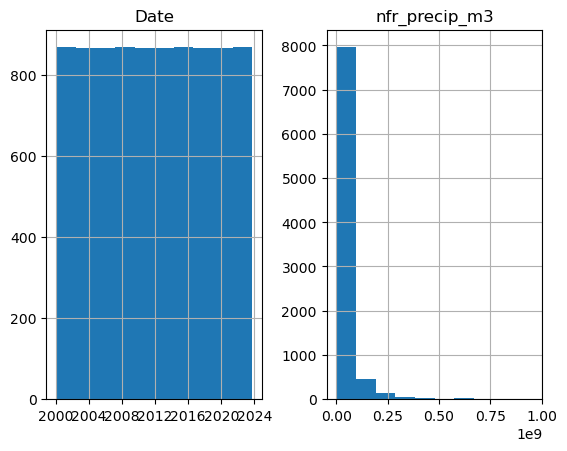

In [5]:
labels_df.hist()

# Calculate the area of the NFR

In [9]:
nfr_mask = xr.open_dataarray('/Users/kathum/Research/COPEX/sink_region_files/masks/co_AltClimate_Northern_Front_Range_source_region.nc')
area = xr.open_dataarray('/Users/kathum/Research/area_grids/quarter_degree_area_grid_all_lat_lon.nc')
(area*nfr_mask).sum(['latitude', 'longitude']).values

array(2.06684926e+10)